Blood Pressure Category Distribution:
blood_pressure_category
High        568
Elevated    256
Normal      201
Name: count, dtype: int64

Category Mapping:
Normal: 0
Elevated: 1
High: 2


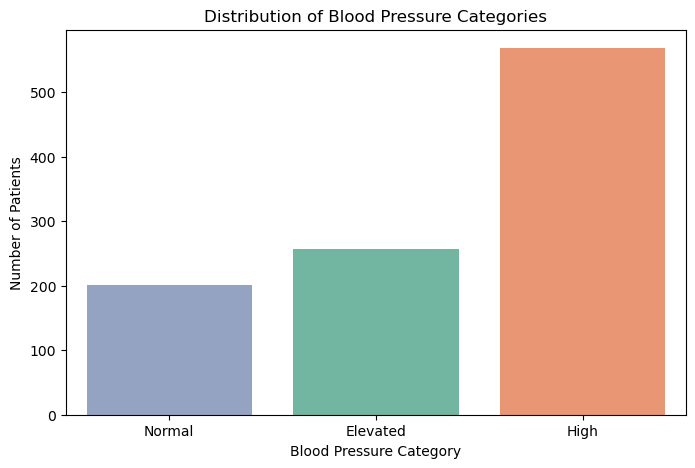


Correlation with heart disease: -0.060

Feature engineering completed! File saved as 'heart_with_bp_feature.csv'


In [1]:
# Feature Engineering by Disanayake B.R.S. - IT24104090
# Creating Blood Pressure Category Feature

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data
df = pd.read_csv('heart.csv')

# 3. Create blood pressure categories
def categorize_bp(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif 120 <= trestbps <= 129:
        return 'Elevated'
    else:
        return 'High'

df['blood_pressure_category'] = df['trestbps'].apply(categorize_bp)

# 4. Encode categories with proper risk order
bp_mapping = {'Normal': 0, 'Elevated': 1, 'High': 2}
df['blood_pressure_category_encoded'] = df['blood_pressure_category'].map(bp_mapping)

# 5. Display results
print("Blood Pressure Category Distribution:")
print(df['blood_pressure_category'].value_counts())

print("\nCategory Mapping:")
for category, number in bp_mapping.items():
    print(f"{category}: {number}")


# 6. EDA Visualization 1: Distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='blood_pressure_category', data=df, order=['Normal', 'Elevated', 'High'], palette='Set2', hue='blood_pressure_category', legend=False)
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Number of Patients')
plt.show()


# 7. Statistical analysis
correlation = df['blood_pressure_category_encoded'].corr(df['target'])
print(f"\nCorrelation with heart disease: {correlation:.3f}")

# 8. Save the processed data
df.to_csv('heart_with_bp_feature.csv', index=False)
print("\nFeature engineering completed! File saved as 'heart_with_bp_feature.csv'")